<a href="https://colab.research.google.com/github/NewburghCat/E-Commerce_Customer_Segmentation/blob/main/Project_II_E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Satisfaction  Project 

*  The customer satisfaction project 
 analyzes shipping data from an E-commerce company. 

Data Source: (https://www.kaggle.com/datasets/prachi13/customer-analytics) 

E-Commerce Shipping Data
Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand

Author: Prachi Gopalani

E-Commerce Shipping Data Product: 

*   An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Target Vector: The 'Reached.on.Time_Y.N' column is the target

Classification 

Feature: 12 Columns
Rows: 10999 rows 


**Interest**

1. Key Insights 
2. Customer Insight 
3. Best practices 
4. Do we need to improve or change?


Library Imports 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
from google.colab import drive 
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data

filename = '/content/drive/MyDrive/Colab Notebooks/Project 2/Train_E-CommerceShippingData.csv'
df = pd.read_csv(filename)
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
# Identify data shape

df.shape

(10999, 12)

In [ ]:
#data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Cleaning

In [ ]:
# Identify duplicates 

df.duplicated().sum()

0

In [ ]:
# Identify missing data 

df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There are no missing values and duplicate values. 

In [ ]:
# create a dtype filter to be used to count their values 

dtypes = df.dtypes
header_columns = dtypes[dtypes=='object'].index
header_columns

for all in header_columns:
  print(f'- column= {all}')
  print(df[all].value_counts(dropna=False))
  print('\n\n')

- column= Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- column= Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- column= Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- column= Gender
F    5545
M    5454
Name: Gender, dtype: int64





In [ ]:
# drop unnecessary columns

df= df.drop(columns=['ID'])

In [ ]:
# drop nan found in rows 

df = df.dropna()

There are two string columns within the dataset. 
Columns: Mode_of_Shipment and Product Importance. 

In [ ]:
# Convert string columns to a numeric value. 
# This ensures accuracy in data evaluation. 
# create filters to replace string 

df['Mode_of_Shipment'] = df['Mode_of_Shipment'].replace({'Ship': 0, 'Flight': 1, 'Road': 2})
df['Product_importance'] = df['Product_importance'].replace({'low':0, 'medium': 1, 'high':2})


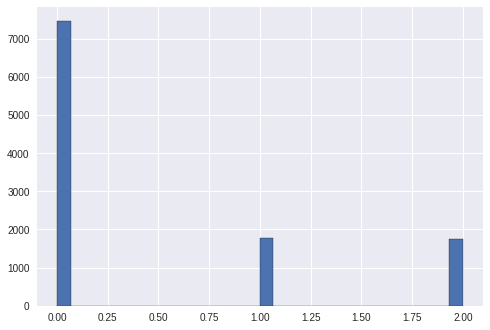

In [ ]:
plt.style.use('seaborn')
df['Mode_of_Shipment'].hist(bins=30, edgecolor='black');

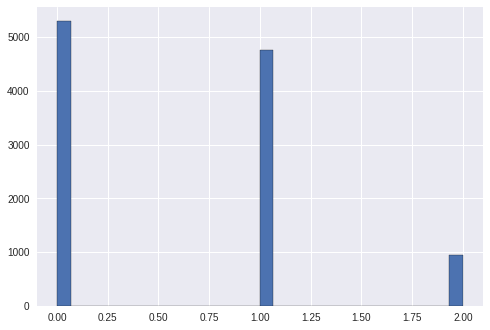

In [ ]:
plt.style.use('seaborn')
df['Product_importance'].hist(bins=30, edgecolor='black');

In [ ]:
df.describe().round(2)

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,0.48,4.05,2.99,210.20,3.57,0.60,13.37,3634.02,0.60
std,0.75,1.14,1.41,48.06,1.52,0.64,16.21,1635.38,0.49
min,0.00,2.00,1.00,96.00,2.00,0.00,1.00,1001.00,0.00
25%,0.00,3.00,2.00,169.00,3.00,0.00,4.00,1839.50,0.00
50%,0.00,4.00,3.00,214.00,3.00,1.00,7.00,4149.00,1.00
75%,1.00,5.00,4.00,251.00,4.00,1.00,10.00,5050.00,1.00
max,2.00,7.00,5.00,310.00,10.00,2.00,65.00,7846.00,1.00


Findings:

The df.describe function returned outliers in columns: Mode of Shipment, Prior_purchases, Product_importance and Discount_offered. 

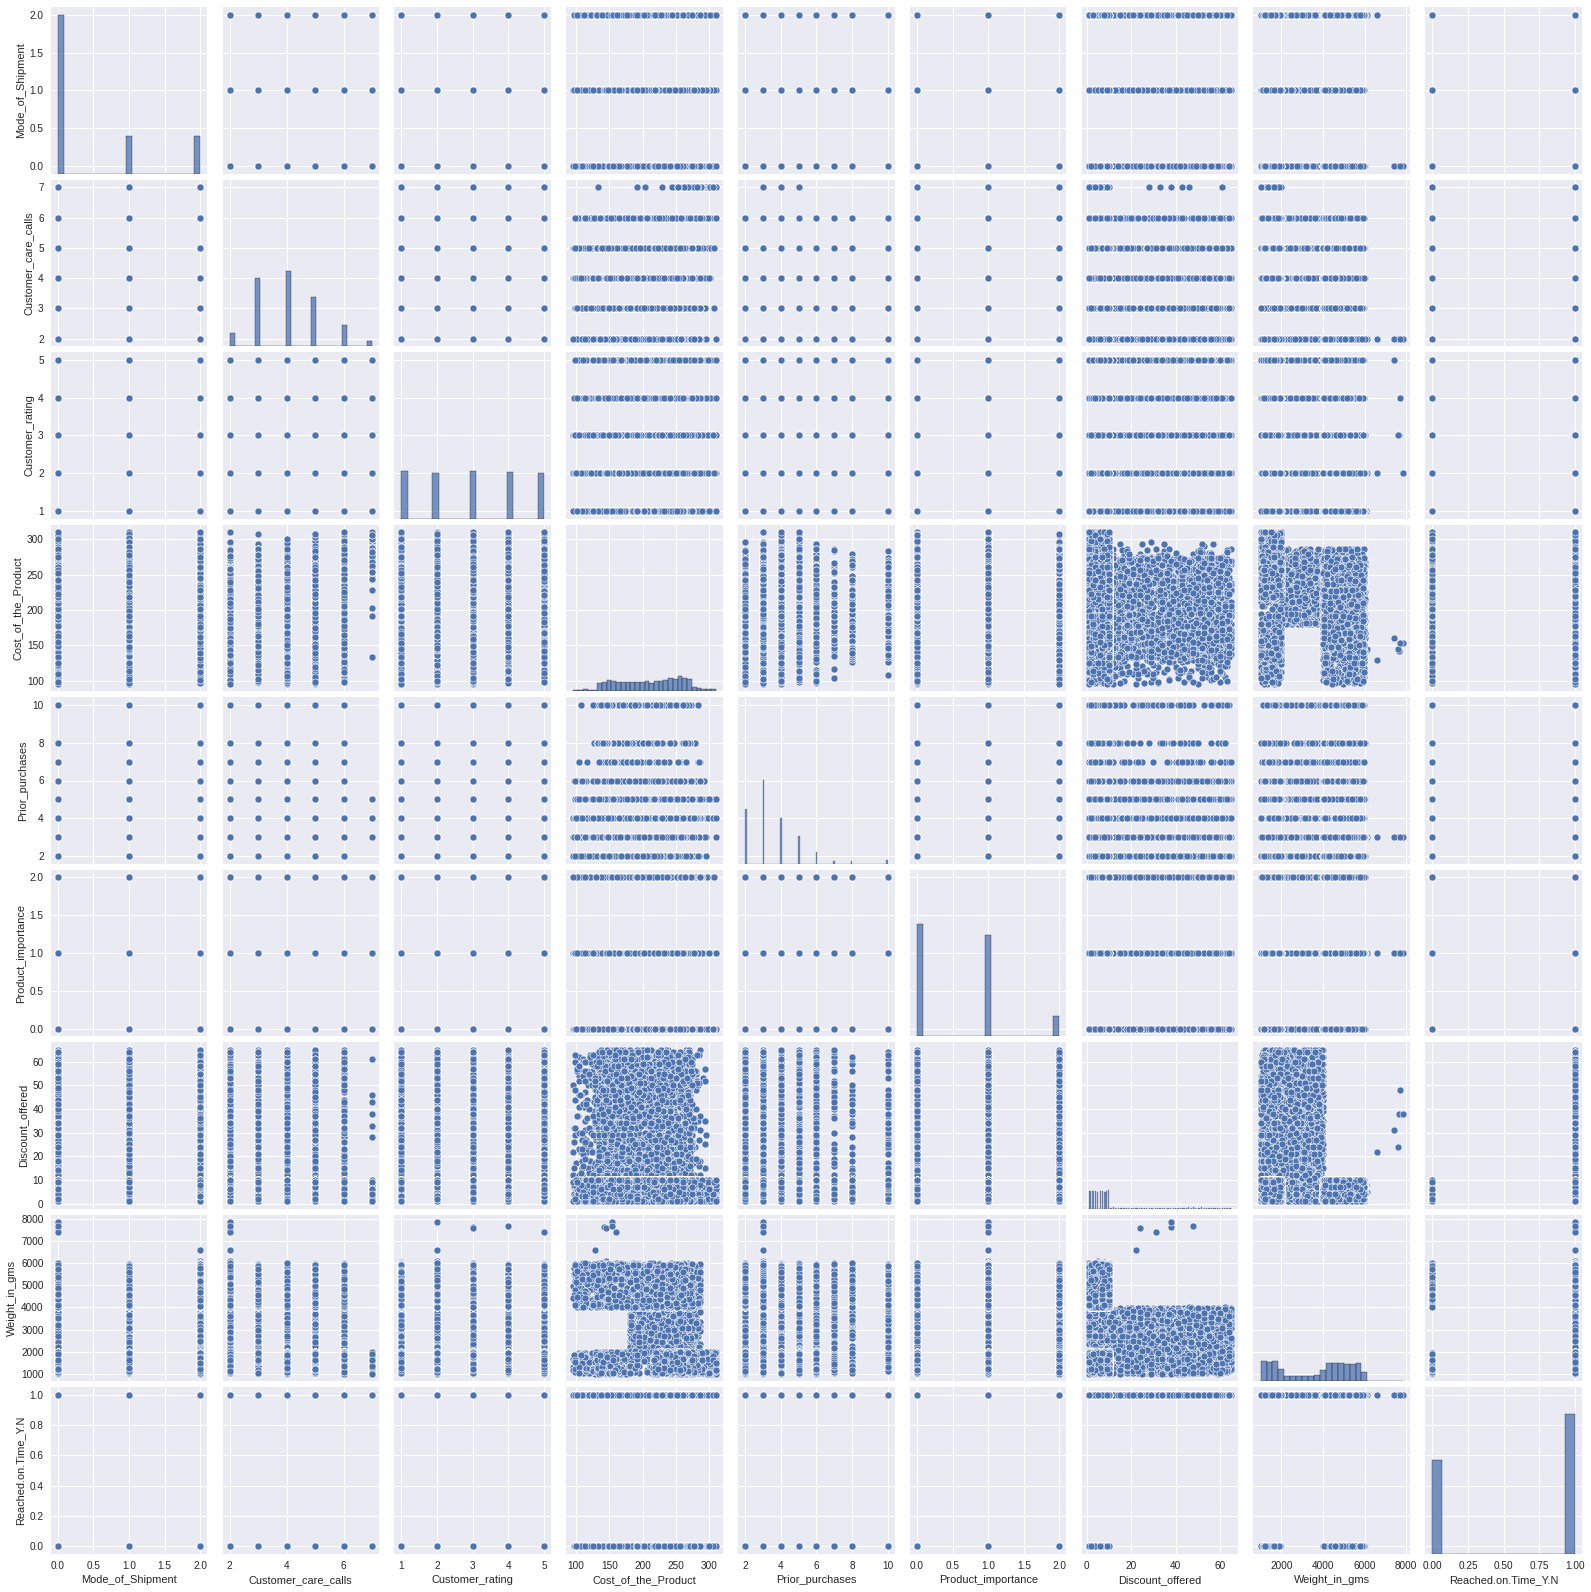

In [ ]:
sns.pairplot(df);


# Outliers 

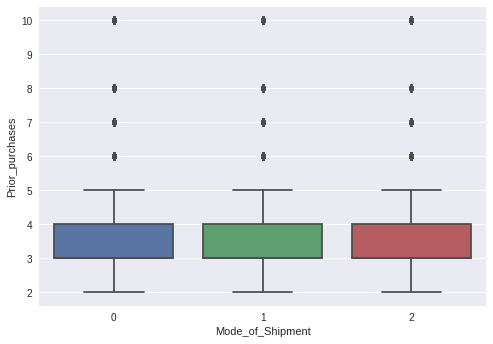

In [ ]:
# create boxplot for the outliers 

sns.boxplot(x='Mode_of_Shipment', y='Prior_purchases', data=df)

Findings:

There are approximately four straggling outliers in both Mode_of_Shipmet and Prior_purchases.

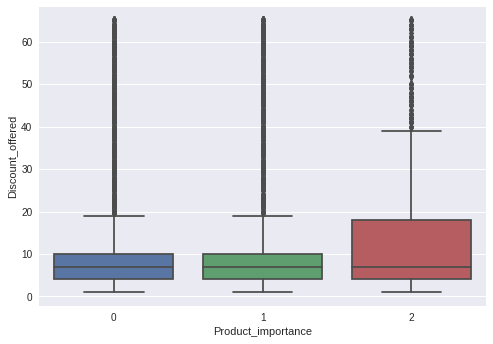

In [ ]:
# create boxplot for the outliers 

sns.boxplot(x='Product_importance', y='Discount_offered', data=df)

Findings:

Product_ importance seems to have more outliers than Discount_offered.

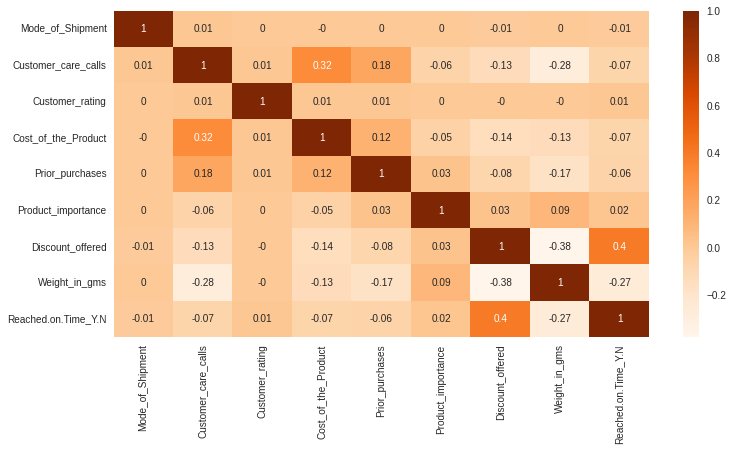

In [ ]:
# create a heatmap to see any possible correlations
plt.figure(figsize = (12,6))
corr = df.corr().round(2)
sns.heatmap(corr, cmap = 'Oranges', annot= True)

All variables seem to be close to 0 

# Preprocessing 

In [ ]:
#  Featured Matrix and Target Vector
y = df['Reached.on.Time_Y.N']
X = df.drop(columns = 'Reached.on.Time_Y.N')

# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#make categorical selector
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
cat_selector(X_train)

['Warehouse_block', 'Gender']

In [ ]:
# create a subset of data for only categorical columns
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,Warehouse_block,Gender
1463,F,F
10751,F,F
3785,F,F
3397,F,F
5737,F,F
...,...,...
5734,C,F
5191,F,F
5390,A,F
860,A,F


In [ ]:
#instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)

#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe


array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
#convert to dataframe, extract new column names from encoder
#set prefixes to original column names

ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe


,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
8244,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8245,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8246,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8247,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')

# isolate the numeric columns
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)

# re-combine the train and test sets on axis 1 (columns)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Gender_F,Gender_M
0,0,4,3,170,2,1,33,1980,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,5,5,244,6,0,1,1222,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,5,5,184,3,0,5,5045,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,4,4,176,3,0,1,4774,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,5,1,248,2,0,6,5281,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,2,3,5,275,2,0,7,4619,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8245,2,5,5,187,4,1,9,5326,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8246,0,4,2,137,2,1,2,5804,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8247,0,5,3,144,6,1,35,1009,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Logistic Regression 

In [ ]:
# Instantiating imputer
mean_imputer = SimpleImputer(strategy='mean')

# Make an instance of the model
logreg = LogisticRegression(C = 1000)

# Instantiate Scaler
scaler = StandardScaler()

# Create pipeline
logreg_pipe = make_pipeline(mean_imputer, scaler, logreg)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train_processed,y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [ ]:
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.6401988119772094
0.6425454545454545


{0.0001: 0.4,
 0.001: 0.6258181818181818,
 0.01: 0.645090909090909,
 0.1: 0.644,
 1: 0.6429090909090909,
 10: 0.6429090909090909,
 100: 0.6425454545454545,
 1000: 0.6425454545454545}

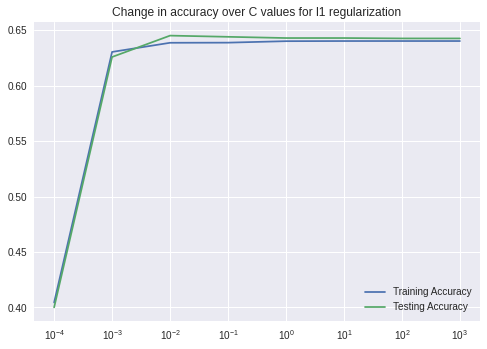

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')

# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [ ]:
# use a metrics function to evaluate the Logistic Regression Model in other metrics
train_pred = logreg.predict(X_train_processed);
test_pred = logreg.predict(X_test_processed);

train_r = classification_report(y_train, train_pred, zero_division=0);
test_r = classification_report(y_test, test_pred, zero_division=0);
print(train_r, "\n\n\n")
print(test_r)

              precision    recall  f1-score   support

           0       0.40      1.00      0.58      3336
           1       0.00      0.00      0.00      4913

    accuracy                           0.40      8249
   macro avg       0.20      0.50      0.29      8249
weighted avg       0.16      0.40      0.23      8249
 



              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1100
           1       0.00      0.00      0.00      1650

    accuracy                           0.40      2750
   macro avg       0.20      0.50      0.29      2750
weighted avg       0.16      0.40      0.23      2750



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Findings:

1st Classification Model- Logistic Regression 
The data was scaled, simple imputed using the mean, and placed in a pipeline. The pipeline was fitted and score printed. (Score 0.64)
When X-train and X-test were evaluated for precision and recall the accuracy of the model was 0.40. The accuracy score is low. 

# KNN Means

In [ ]:
# Create a KNN model with the scaler and imputer

knn = KNeighborsClassifier()
knn_pipe = make_pipeline(num_pipe, knn)

# Fit training data
knn_pipe.fit(X_train_processed, y_train)

# Obtaining KNN model score
k_score = knn_pipe.score(X_test_processed, y_test)
k_score

0.6250909090909091

In [ ]:
# Initializing pipeline with scaler and the model

pipe_knn = make_pipeline(num_pipe, KNeighborsClassifier())

In [ ]:
# creating parameter dictionary to use in GridSearchCV object

param_grid = {
    "kneighborsclassifier__n_neighbors": range(1,10),
    "kneighborsclassifier__p": range(1,5),
    "kneighborsclassifier__weights": ['distance', 'uniform']



In [ ]:
%%time
# putting the knn pipeline and parameter grid inside the GridSearch
knn_pipe_gs = GridSearchCV(pipe_knn, param_grid)

# fitting on the training data
knn_pipe_gs.fit(X_train_processed, y_train)

# printing the results for the best parameters. 
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_processed, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.632
CPU times: user 9min 23s, sys: 835 ms, total: 9min 24s
Wall time: 9min 21s


2nd Classification Model - KNN Means 

Knn means underwent a similar process as the logistic regession. 
The knn means model score at 0.63 but the accurarcy of the model was positive (1.0)

In [ ]:
# creating classification report for the best knn model
train_knn_pred = best_pipe.predict(X_train_processed)
test_knn_pred = best_pipe.predict(X_test_processed)
# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_knn_pred)
test_report = classification_report(y_test, test_knn_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      4913

    accuracy                           1.00      8249
   macro avg       1.00      1.00      1.00      8249
weighted avg       1.00      1.00      1.00      8249
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1100
           1       0.70      0.67      0.69      1650

    accuracy                           0.63      2750
   macro avg       0.62      0.62      0.62      2750
weighted avg       0.64      0.63      0.63      2750



The training set accuracy was positive and the testing set was mediocre. 

# Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


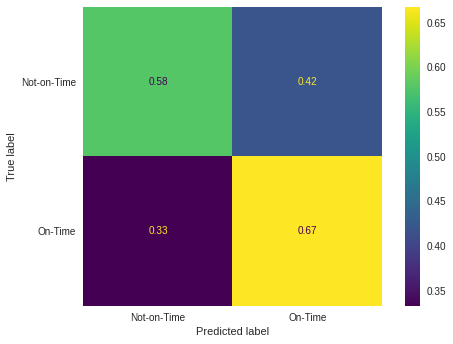

In [ ]:
# Creatin labels for use on a confusion matrix 
labels = ['Not-on-Time', 'On-Time']

# Creating confusion matrix for best KNN model
plot_confusion_matrix(estimator=best_pipe, display_labels=labels, X=X_test_processed, 
                      y_true=y_test, normalize='true');
plt.grid(False);

This confusion matrix shows a total of 2 preditions. 

PCA 

In [ ]:
# Instantiating PCA with 95% variance capture
pca =PCA(n_components=.95)
# Using the best KNN model that has already been hypertuned along with PCA
knn_pca_pipe = make_pipeline(num_pipe, pca, best_pipe)
# Fitting the model on the training dataset
knn_pca_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA(n_components=0.95)),
                ('pipeline-2',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())])),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=6, p=4,
                                                       weights='distance'))]))])

In [ ]:
# Looking at KNN with PCA score
knn_pca_score =knn_pca_pipe.score(X_test_processed, y_test)
knn_pca_score

0.641090909090909

In [ ]:
# creating classification report for KNN with PCA
train_knn_pca_pred = knn_pca_pipe.predict(X_train_processed)
test_knn_pca_pred = knn_pca_pipe.predict(X_test_processed)

# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_knn_pca_pred)
test_report = classification_report(y_test, test_knn_pca_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      4913

    accuracy                           1.00      8249
   macro avg       1.00      1.00      1.00      8249
weighted avg       1.00      1.00      1.00      8249
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.55      0.59      0.57      1100
           1       0.71      0.67      0.69      1650

    accuracy                           0.64      2750
   macro avg       0.63      0.63      0.63      2750
weighted avg       0.65      0.64      0.64      2750



Out of the confusion matrix predictions the accuracy is positive on the training set but not on the testing set. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


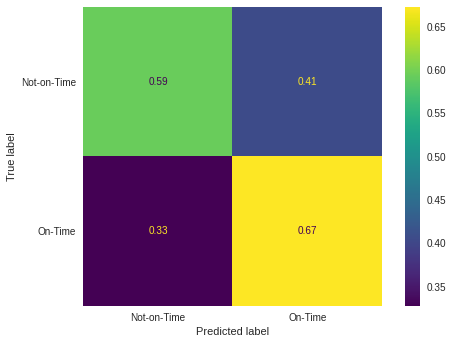

In [ ]:
# Creatin labels for use on a confusion matrix 
labels = ['Not-on-Time', 'On-Time']

# Creating confusion matrix for  KNN with PCA model
plot_confusion_matrix(estimator=knn_pca_pipe, display_labels=labels, X=X_test_processed, 
                      y_true=y_test, normalize='true');
plt.grid(False);

Again, the confusion matrixs with the PCA and without the PCA outputs the same accuracy. 

# Random Forest

In [ ]:
## Evaluation function
def Eval_classification(model,X_train,X_test,y_train,y_test):

    """Uses model.score to display the R^2 values for training and test splits"""
    
    print(f"Training Accuracy: {model.score(X_train,y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test,y_test):.3f}")

In [ ]:
# 
## Make, fit, and evaluate RandomForestClassifier with initial conditions of 42 max depth for nodes
rt_tree = RandomForestClassifier(random_state=42)

# Making a pipeline for the model and including the scaler and imputer
rt_pipe = make_pipeline(num_pipe, rt_tree)

# Fitting onto the training set
rt_pipe.fit(X_train_processed, y_train)

# Obtaining score for the decision tree model
rt_score = rt_pipe.score(X_test_processed, y_test)
rt_score


0.6592727272727272

In [ ]:
# Getting parameters in order to hypertune the random tree model
rt_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('simpleimputer', SimpleImputer()),
                   ('standardscaler', StandardScaler())])),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'pipeline__memory': None,
 'pipeline__steps': [('simpleimputer', SimpleImputer()),
  ('standardscaler', StandardScaler())],
 'pipeline__verbose': False,
 'pipeline__simpleimputer': SimpleImputer(),
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__simpleimputer__add_indicator': False,
 'pipeline__simpleimputer__copy': True,
 'pipeline__simpleimputer__fill_value': None,
 'pipeline__simpleimputer__missing_values': nan,
 'pipeline__simpleimputer__strategy': 'mean',
 'pipeline__simpleimputer__verbose': 0,
 'pipeline__standardscaler__copy': True,
 'pipeli

In [ ]:
# creating parameter dictionary to be used with Grid Search
param_grid = {'randomforestclassifier__max_depth':[3,5, 10],
              'randomforestclassifier__min_samples_leaf':[1, 2, 3],
              'randomforestclassifier__min_samples_split':[50, 125, 250]}

In [ ]:
%%time
# Hypertuning using Grid Search
rt_grid_search = GridSearchCV(rt_pipe, param_grid)

# Fitting on training data
rt_grid_search.fit(X_train_processed, y_train)

# displaying best parameters in order to recreate best model
rt_grid_search.best_params_


CPU times: user 59 s, sys: 257 ms, total: 59.3 s
Wall time: 60 s


{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__min_samples_split': 50}

In [ ]:
# Creating a decision tree model with the best parameters
best_rt_tree = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=50)
s
# Creating pipeline with best model along with scaler and imputer pipeline.
rt_best_pipe = make_pipeline(num_pipe, best_rt_tree)

# Fitting onto the training set
rt_best_pipe.fit(X_train_processed, y_train)

# Obtaining sccore for the decision tree model
rt_best_score = rt_pipe.score(X_test_processed, y_test)
rt_best_score

0.6592727272727272

In [ ]:
#@title Default title text
# creating classification report for the best random forest tree model
train_tree_pred = rt_best_pipe.predict(X_train_processed)
test_tree_pred = rt_best_pipe.predict(X_test_processed)
# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_tree_pred)
test_report = classification_report(y_test, test_tree_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.58      0.86      0.70      3336
           1       0.86      0.58      0.70      4913

    accuracy                           0.70      8249
   macro avg       0.72      0.72      0.70      8249
weighted avg       0.75      0.70      0.70      8249
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.57      0.85      0.68      1100
           1       0.85      0.57      0.68      1650

    accuracy                           0.68      2750
   macro avg       0.71      0.71      0.68      2750
weighted avg       0.74      0.68      0.68      2750



The random forest score is higher than all the other models at 0.65 but the accuracy of both the training set and testing set is low. 

Observations 